# Mutual coherence of different affinity matrices
---

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mirrored_langevin_rnn.simulator.sensory_scene.sensing_matrix import gen_sensing_matrix
from mirrored_langevin_rnn.utils.visualization.styling import PlotStyle
from mirrored_langevin_rnn.utils.visualization.styling import apply_style
from mirrored_langevin_rnn.simulator.sensory_scene import SensoryScene

In [14]:
def compute_gram_matrix(effective_dictionary):
    """
    G = (PD)^T * PD
    """
    return effective_dictionary @ effective_dictionary.T

In [26]:
def plot_histogram_with_coherence(G, ax=None):
    """
    Plot histogram of |off-diagonal entries| of Gram G,
    and compute/annotate:
      • μ  = max_{i≠j} |G[i,j]|
      • μ_t = average of {|G[i,j]| : |G[i,j]| ≥ 60th percentile}
    """
    # --- extract off-diagonals ---
    k    = G.shape[0]
    mask = ~np.eye(k, dtype=bool)
    off  = np.abs(G[mask])
    
    # --- worst-case coherence μ ---
    mu = off.max()

    # --- threshold t = 90th percentile ---
    t = np.percentile(off, 80)
    
    # --- t-averaged coherence μ_t ---
    vals_t = off[off >= t]
    mu_t   = vals_t.mean()
    
    # --- print results ---
    print(f"μ (max off-diagonal)      = {mu:.4f}")
    print(f"90th percentile (t)        = {t:.4f}")
    print(f"μₜ (avg ≥ t)               = {mu_t:.4f}")
    
    # --- prepare axes ---
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,2))
    
    # --- histogram ---
    ax.hist(off, bins=80, density=True)
    
    # --- annotate on plot ---
    txt = (
        f"μ   = {mu:.3f}\n"
        f"t   = {t:.3f}\n"
        f"μₜ  = {mu_t:.3f}"
    )
    # place in upper right corner
    # ax.text(
    #     0.95, 0.95, txt,
    #     transform=ax.transAxes,
    #     ha='right', va='top',
    #     fontsize=26,
    #     bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    # )
    
    # --- labels & title ---
    # ax.set_xlabel('Absolute Off-Diagonal Elements', fontsize=14, labelpad=8)
    # ax.set_ylabel('Frequency', fontsize=14, labelpad=8)
    # ax.set_title('Histogram of |Off-Diagonal Gram| with Coherences', pad=12)
    
    # # --- style spines & ticks ---
    # for spine in ("top","right"):
    #     ax.spines[spine].set_visible(False)
    # ax.spines["bottom"].set_linewidth(2)
    # ax.spines["left"].set_linewidth(2)
    # ax.tick_params(
    #     axis='both',
    #     which='both',
    #     direction='in',
    #     length=8,
    #     width=2,
    #     labelsize=26,
    #     pad=6
    # )
    
    # --- x-axis limit ---
    # ax.set_xlim(0, 0.5)
    # ax.set_ylim(0, 8000)
    
    # --- add vertical line at μ ---
    ax.axvline(mu_t, color='#FF6712', linestyle='--', linewidth=3, label=f'μₜ = {mu_t:.3f}')
    ax.axvline(mu, color='#40B0A6', linestyle='--', linewidth=3, label=f'μ = {mu:.3f}')
    ax.legend(fontsize=14)
    
    # plt.tight_layout()
    # plt.show()
    
    return ax

In [27]:
# plotting_binary_histogram
import sys, os
from pathlib import Path
project_root = Path.cwd().parent  # from data_pipeline → SLAM_olfaction
sys.path.append(str(project_root))


In [28]:
output_dir = project_root / "figures" / "mutual_coherence"
os.makedirs(output_dir, exist_ok=True)

In [29]:
num_osn = 600
num_potential_odors = 5000

In [30]:
style_1 = PlotStyle(fig_width=3, fig_height=2)

(5000, 5000)
μ (max off-diagonal)      = 0.4933
90th percentile (t)        = 0.3024
μₜ (avg ≥ t)               = 0.3236


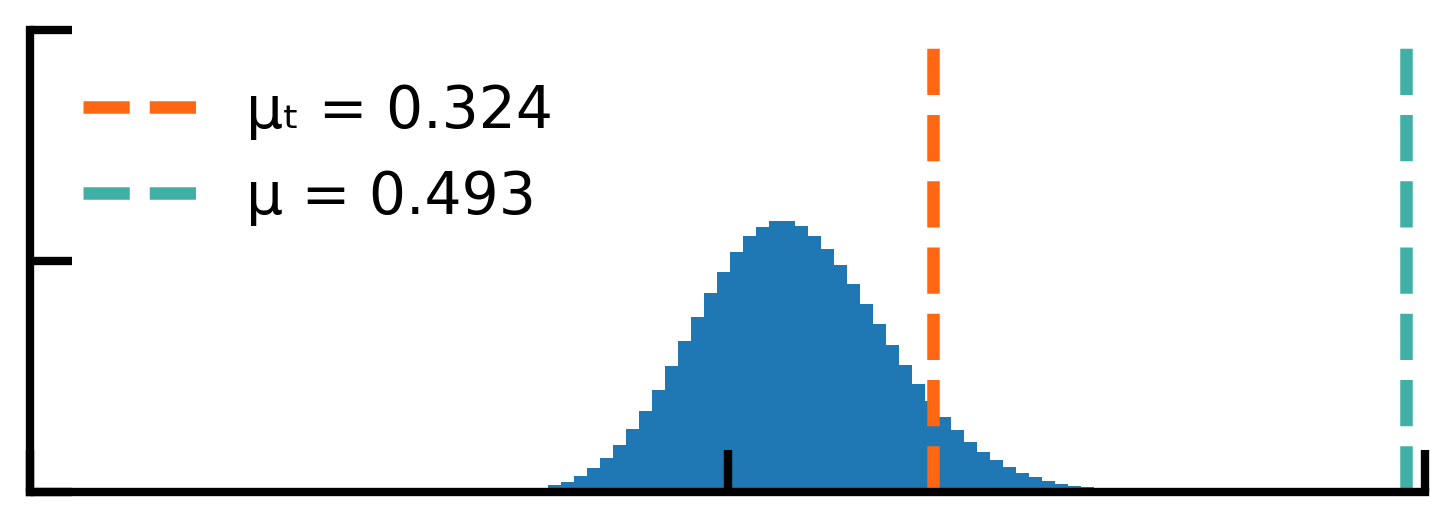

In [31]:
M = gen_sensing_matrix(matrix_type="dense_gamma", num_osn=num_osn, num_potential_odors=num_potential_odors)
col_norms = np.linalg.norm(M, axis=0, keepdims=True)
# l2 norm the columns
Dtilde    = M / col_norms
G = Dtilde.T @ Dtilde
print(G.shape)

ax = plot_histogram_with_coherence(G)
apply_style(ax, style_1)
ax.set_xticks([0, 0.25, 0.5])
ax.set_xticklabels([])
ax.set_yticks([0, 10, 20])
ax.set_yticklabels([])

ax.figure.savefig(output_dir / "mutual_coherence_histogram_dense_gamma.svg", bbox_inches='tight')

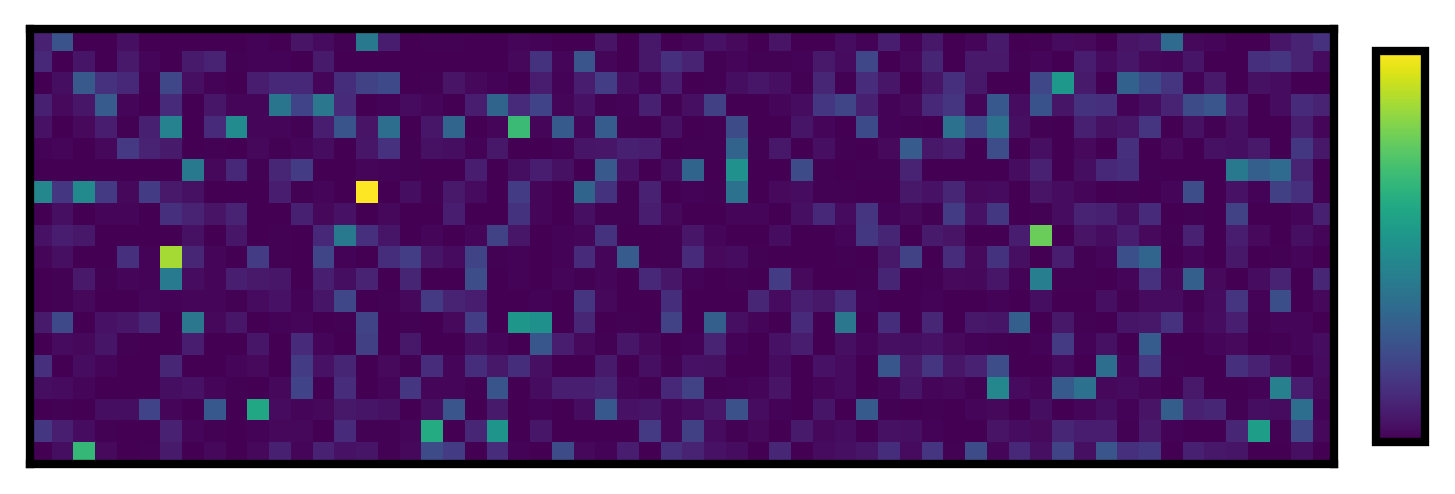

In [32]:
fig, ax = plt.subplots(figsize=(6, 3))
img = ax.imshow(M[0:20, 0:60], cmap='viridis')
ax.set_xticks([])
ax.set_yticks([])
cbar = fig.colorbar(img, ax=ax,fraction=0.035, aspect=8, pad=0.03)
cbar.set_ticks([])

ax.figure.savefig(output_dir / "sensing_matrix_dense_gamma.svg", bbox_inches='tight')

(600, 5000)
μ (max off-diagonal)      = 0.3342
90th percentile (t)        = 0.1313
μₜ (avg ≥ t)               = 0.1545


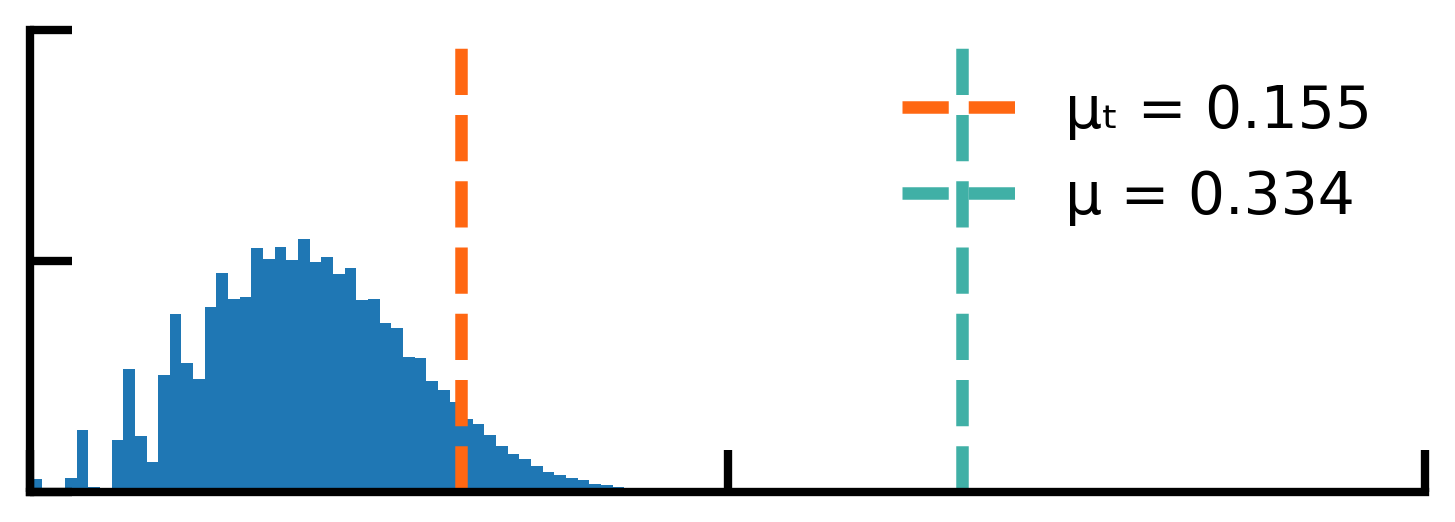

In [33]:
M = gen_sensing_matrix(matrix_type="sparse_binary", num_osn=num_osn, num_potential_odors=num_potential_odors, sparsity=0.1)
print(M.shape)
col_norms = np.linalg.norm(M, axis=0, keepdims=True)
# l2 norm the columns
Dtilde    = M / col_norms
G = Dtilde.T @ Dtilde

ax = plot_histogram_with_coherence(G)
apply_style(ax, style_1)
ax.set_xticks([0, 0.25, 0.5])
ax.set_xticklabels([])
ax.set_yticks([0, 10, 20])
ax.set_yticklabels([])
ax.figure.savefig(output_dir / "mutual_coherence_histogram_sparse_binary.svg", bbox_inches='tight')

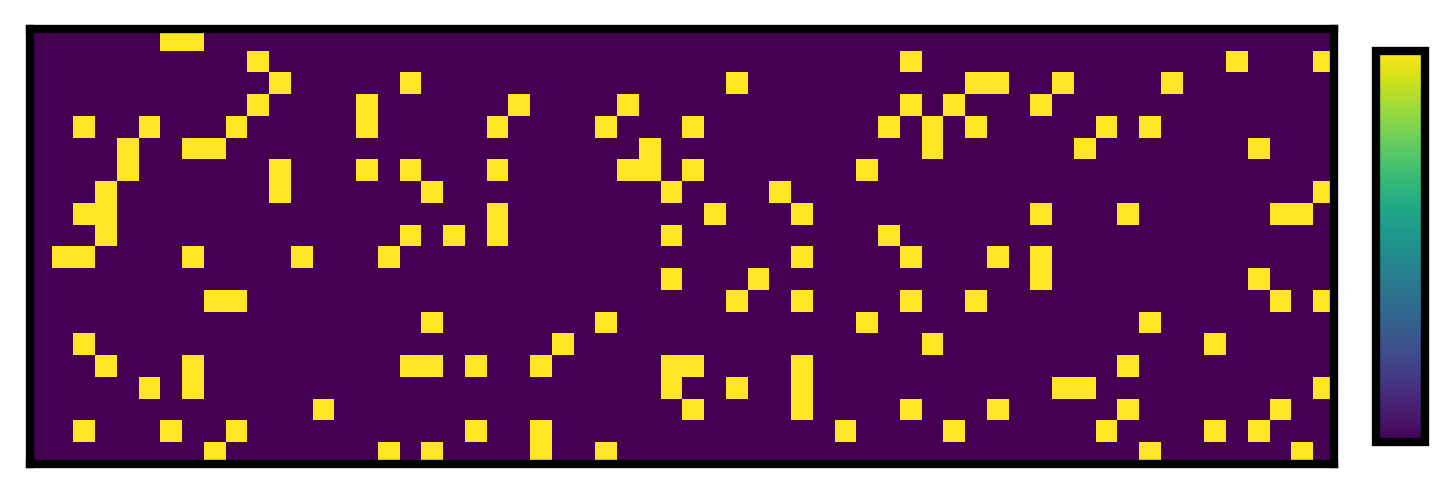

In [34]:
fig, ax = plt.subplots(figsize=(6, 3))
img = ax.imshow(M[0:20, 0:60], cmap='viridis')
ax.set_xticks([])
ax.set_yticks([])
cbar = fig.colorbar(img, ax=ax,fraction=0.035, aspect=8, pad=0.03)
cbar.set_ticks([])

ax.figure.savefig(output_dir / "sensing_matrix_sparse_binary.svg", bbox_inches='tight')

μ (max off-diagonal)      = 0.7438
90th percentile (t)        = 0.0448
μₜ (avg ≥ t)               = 0.0927


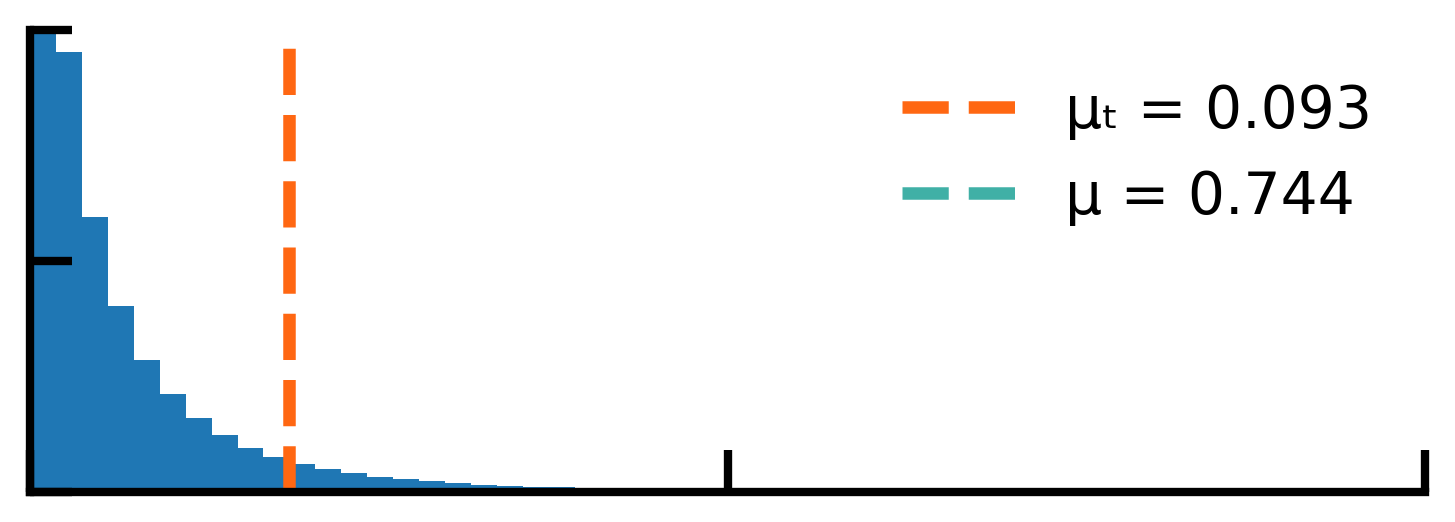

In [35]:
M = gen_sensing_matrix(matrix_type="sparse_gamma", num_osn=num_osn, num_potential_odors=num_potential_odors, sparsity=0.1)
col_norms = np.linalg.norm(M, axis=0, keepdims=True)
# l2 norm the columns
Dtilde    = M / col_norms
G = Dtilde.T @ Dtilde


ax = plot_histogram_with_coherence(G)
apply_style(ax, style_1)
ax.set_ylim(0, 20)
ax.set_xlim(0, 0.5)
ax.set_xticks([0, 0.25, 0.5])
ax.set_xticklabels([])
ax.set_yticks([0, 10, 20])
ax.set_yticklabels([])


ax.figure.savefig(output_dir / "mutual_coherence_histogram_sparse_gamma.svg", bbox_inches='tight')

1.0


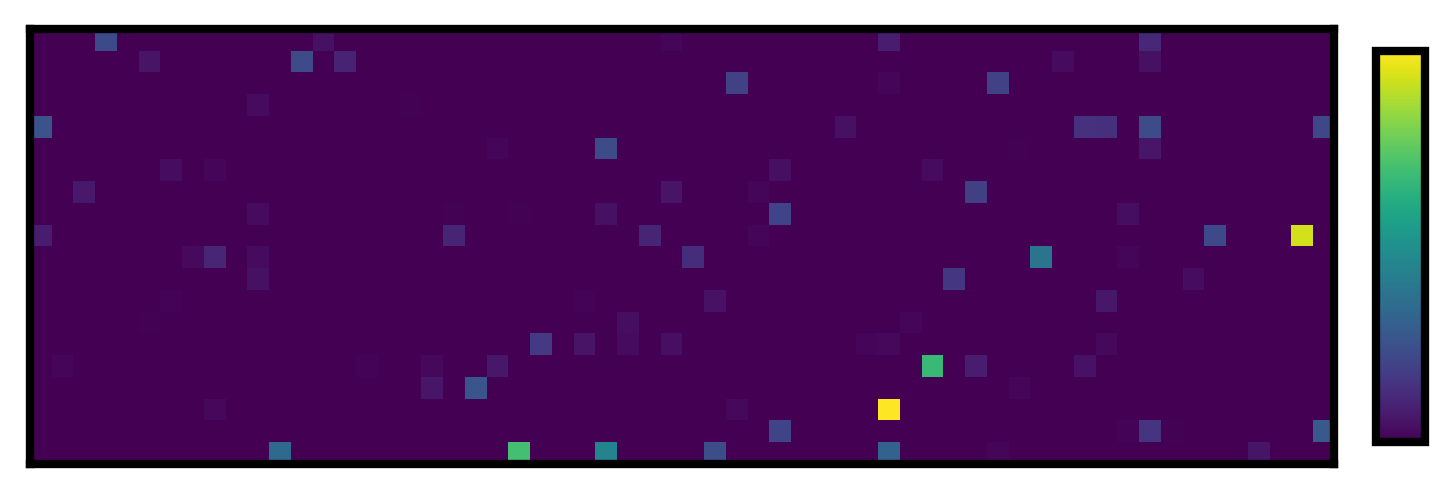

In [36]:
print(np.max(M))
fig, ax = plt.subplots(figsize=(6, 3))
img = ax.imshow(M[0:20, 0:60], cmap='viridis')
ax.set_xticks([])
ax.set_yticks([])
cbar = fig.colorbar(img, ax=ax,fraction=0.035, aspect=8, pad=0.03)
cbar.set_ticks([])
ax.figure.savefig(output_dir / "sensing_matrix_sparse_gamma.svg", bbox_inches='tight')

(600, 5000)
(5000, 5000)
(600, 5000)
(5000, 5000)
(600, 5000)
(5000, 5000)
(600, 5000)
(5000, 5000)
(600, 5000)
(5000, 5000)


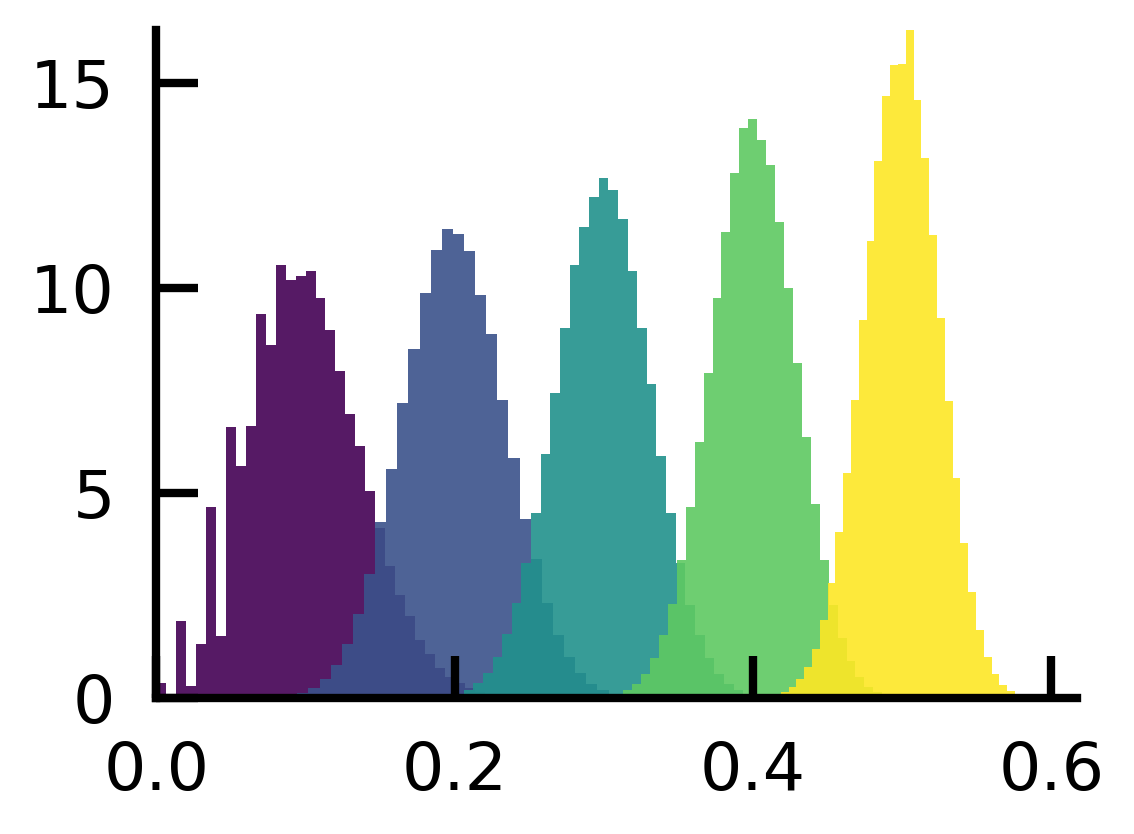

In [37]:
# Plot histograms for different sparsity values with color gradient
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(4, 3))

sparsity_values = np.arange(0.1, 0.6, 0.1)  # 0.1 to 0.5 with step 0.1
colors = cm.viridis(np.linspace(0, 1, len(sparsity_values)))

for i, sparsity in enumerate(sparsity_values):
    # Generate sparse binary matrix
    M = gen_sensing_matrix(matrix_type="sparse_binary", num_osn=num_osn, num_potential_odors=num_potential_odors, sparsity=sparsity)
    print(M.shape)
    col_norms = np.linalg.norm(M, axis=0, keepdims=True)
    # l2 norm the columns
    Dtilde = M / col_norms
    G = Dtilde.T @ Dtilde
    print(G.shape)
    
    # Extract off-diagonal values
    k = G.shape[0]
    mask = ~np.eye(k, dtype=bool)
    off = np.abs(G[mask])
    
    # Plot histogram with transparency
    ax.hist(off, bins=50, alpha=0.9, color=colors[i],
            label=f'Sparsity = {sparsity:.1f}', density=True)

# ax.set_xlabel('Absolute Off-Diagonal Elements', fontsize=14)
# ax.set_ylabel('Density', fontsize=14)
# ax.set_title('Mutual Coherence Histograms for Different Sparsity Values\n(Sparse Binary Matrix)', fontsize=16)
# ax.legend(fontsize=12)
# ax.set_xlim(0, 0.6)
# ax.set_ylim(0, 45)

# Style spines & ticks
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis='both', which='both', direction='in', length=6, width=2, labelsize=12)

ax = apply_style(ax, style_1)

plt.tight_layout()
plt.show()

fig.savefig(output_dir / "mutual_coherence_histogram_sparse_binary_different_sparsity.svg", bbox_inches='tight')

In [38]:
import re
from matplotlib.pylab import f
from numpy import percentile

def compute_mutual_coherence_heatmap(x_axis: tuple, y_axis: tuple, repeat: int, sparsity: float, percentile: float, matrix_type: str) -> np.ndarray:
    heatmap = np.zeros((len(x_axis), len(y_axis), 3))
    for i, num_osn in enumerate(x_axis):
        for j, num_sensors in enumerate(y_axis):
            mu_mean, t_mean, mu_t_mean = compute_avg_mutual_coherence(num_osn=num_osn, num_sensors=num_sensors, sparsity=sparsity, repeat=repeat, percentile=percentile, matrix_type=matrix_type)
            # print(f"num_osn={num_osn}, num_sensors={num_sensors} => μ={mu_mean:.4f}, t={t_mean:.4f}, μₜ={mu_t_mean:.4f}")
            if i == 0 and j == 0:
                heatmap = np.zeros((len(x_axis), len(y_axis), 3))
            heatmap[i,j,0] = mu_mean
            heatmap[i,j,1] = t_mean
            heatmap[i,j,2] = mu_t_mean

    return heatmap

def compute_avg_mutual_coherence(num_osn: int, num_sensors: int, sparsity: float, repeat: int, percentile: float, matrix_type: str) -> tuple:
    sensing_matrix = gen_sensing_matrix(num_osn=num_osn, num_potential_odors=num_sensors, matrix_type=matrix_type, sparsity=sparsity)
    print(f"shape: {sensing_matrix.shape}")
    mu_arr = []
    mu_t_arr = []
    t_arr = []
    for _ in range(repeat):
        off, mu, t, mu_t = compute_coherence(sensing_matrix, percentile=percentile)
        mu_arr.append(mu)
        mu_t_arr.append(mu_t)
        t_arr.append(t)

    mu_mean = np.mean(mu_arr)
    mu_t_mean = np.mean(mu_t_arr)
    t_mean = np.mean(t_arr)

    return mu_mean, t_mean, mu_t_mean

def compute_coherence(sensing_matrix: np.ndarray, percentile: float=80):
    # print(f"Computing coherence for matrix of shape: {sensing_matrix.shape}")
    col_norms = np.linalg.norm(sensing_matrix, axis=0, keepdims=True)
    # l2 norm the columns
    Dtilde = sensing_matrix / (col_norms + 1e-8)
    G = np.matmul(Dtilde.T, Dtilde)
    # print(G.shape)
    
    # --- extract off-diagonals ---
    k    = G.shape[0]
    mask = ~np.eye(k, dtype=bool)
    off  = np.abs(G[mask])
    
    # --- worst-case coherence μ ---
    mu = off.max()

    t = np.percentile(off, percentile)

    # --- t-averaged coherence μ_t ---
    vals_t = off[off >= t]
    mu_t   = vals_t.mean()
    
    # --- print results ---
    # print(f"μ (max off-diagonal)      = {mu:.4f}")
    # print(f"60th percentile (t)        = {t:.4f}")
    # print(f"μₜ (avg ≥ t)               = {mu_t:.4f}")
    return off,mu,t,mu_t

In [16]:
# Compute all matrix data and create unified normalization
import matplotlib.colors as mcolors

repeat = 3

# Set up parameter grid
start = 1000
end = 16000 
num = 16
num_odors = tuple(sorted({int(round(x)) for x in np.logspace(np.log10(start), np.log10(end), num)}))
print(f"x_axis: {num_odors}")
y_start = 100
y_end = 800
y_stepsize = 50
num_osn = tuple(range(y_start, y_end + 1, y_stepsize))

print("Computing mutual coherence data for all matrix types...")

# Compute sparse binary data
print("Computing sparse binary...")
mesh_grid_sparse_binary = compute_mutual_coherence_heatmap(num_osn, num_odors,  repeat=repeat, sparsity=0.1, percentile=95, matrix_type="sparse_binary")

# Compute sparse gamma data  
print("Computing sparse gamma...")
mesh_grid_sparse_gamma = compute_mutual_coherence_heatmap(num_osn, num_odors, repeat=repeat, sparsity=0.1, percentile=95, matrix_type="sparse_gamma")


print("Computing dense gamma...")
mesh_grid_dense_gamma = compute_mutual_coherence_heatmap(num_osn, num_odors, repeat=repeat, sparsity=0.1, percentile=95, matrix_type="dense_gamma")

# Calculate unified normalization across ALL data (now NaN-free)
all_data_min = min(
    mesh_grid_sparse_binary[:, :, 0].min(), mesh_grid_sparse_binary[:, :, 2].min(),
    mesh_grid_sparse_gamma[:, :, 0].min(), mesh_grid_sparse_gamma[:, :, 2].min(),
    mesh_grid_dense_gamma[:, :, 0].min(), mesh_grid_dense_gamma[:, :, 2].min()
)

all_data_max = max(
    mesh_grid_sparse_binary[:, :, 0].max(), mesh_grid_sparse_binary[:, :, 2].max(),
    mesh_grid_sparse_gamma[:, :, 0].max(), mesh_grid_sparse_gamma[:, :, 2].max(),
    mesh_grid_dense_gamma[:, :, 0].max(), mesh_grid_dense_gamma[:, :, 2].max()
)

# Create unified normalization
norm_global = mcolors.Normalize(vmin=all_data_min, vmax=all_data_max)

print(f"Unified normalization range: [{all_data_min:.4f}, {all_data_max:.4f}]")
print("All data computed. Ready for plotting with unified color scale.")

x_axis: (1000, 1203, 1447, 1741, 2095, 2520, 3031, 3647, 4387, 5278, 6350, 7639, 9190, 11055, 13300, 16000)
Computing mutual coherence data for all matrix types...
Computing sparse binary...
shape: (100, 1000)
shape: (100, 1203)
shape: (100, 1447)
shape: (100, 1741)
shape: (100, 2095)
shape: (100, 2520)
shape: (100, 3031)
shape: (100, 3647)
shape: (100, 4387)
shape: (100, 5278)
shape: (100, 6350)
shape: (100, 7639)
shape: (100, 9190)
shape: (100, 11055)
shape: (100, 13300)
shape: (100, 16000)
shape: (150, 1000)
shape: (150, 1203)
shape: (150, 1447)
shape: (150, 1741)
shape: (150, 2095)
shape: (150, 2520)
shape: (150, 3031)
shape: (150, 3647)
shape: (150, 4387)
shape: (150, 5278)
shape: (150, 6350)
shape: (150, 7639)
shape: (150, 9190)
shape: (150, 11055)
shape: (150, 13300)
shape: (150, 16000)
shape: (200, 1000)
shape: (200, 1203)
shape: (200, 1447)
shape: (200, 1741)
shape: (200, 2095)
shape: (200, 2520)
shape: (200, 3031)
shape: (200, 3647)
shape: (200, 4387)
shape: (200, 5278)
shape

```python
    num_potential_odors_values: 
      start: !!int 1000
      end: !!int 16000
      num: !!int 16
    num_osn_values: 
      start: !!int 100
      stepsize: !!int 50
      end: !!int 800
```

In [17]:
# # Check for and handle NaN values in sparse_gamma
# if np.isnan(mesh_grid_sparse_gamma).any():
#     print("Warning: Found NaN values in sparse_gamma data. Replacing with median values...")
#     # Replace NaN with median of valid values for each metric
#     for metric_idx in [0, 2]:  # μ and μₜ
#         data_slice = mesh_grid_sparse_gamma[:, :, metric_idx]
#         if np.isnan(data_slice).any():
#             median_val = np.nanmedian(data_slice)
#             mesh_grid_sparse_gamma[:, :, metric_idx] = np.where(np.isnan(data_slice), median_val, data_slice)
#             print(f"  Replaced NaN in metric {metric_idx} with median: {median_val:.4f}")

# # Compute dense gamma data

# if np.isnan(mesh_grid_dense_gamma).any():
#     print("Warning: Found NaN values in dense_gamma data. Replacing with median values...")
#     # Replace NaN with median of valid values for each metric
#     for metric_idx in [0, 2]:  # μ and μₜ
#         data_slice = mesh_grid_dense_gamma[:, :, metric_idx]
#         if np.isnan(data_slice).any():
#             median_val = np.nanmedian(data_slice)
#             mesh_grid_dense_gamma[:, :, metric_idx] = np.where(np.isnan(data_slice), median_val, data_slice)
#             print(f"  Replaced NaN in metric {metric_idx} with median: {median_val:.4f}")
            
# if np.isnan(mesh_grid_sparse_binary).any():
#     print("Warning: Found NaN values in sparse_binary data. Replacing with median values...")
#     # Replace NaN with median of valid values for each metric
#     for metric_idx in [0, 2]:  # μ and μₜ
#         data_slice = mesh_grid_sparse_binary[:, :, metric_idx]
#         if np.isnan(data_slice).any():
#             median_val = np.nanmedian(data_slice)
#             mesh_grid_sparse_binary[:, :, metric_idx] = np.where(np.isnan(data_slice), median_val, data_slice)
#             print(f"  Replaced NaN in metric {metric_idx} with median: {median_val:.4f}")
            


In [18]:
all_data_min = min(
    mesh_grid_sparse_binary[:, :, 0].min(), mesh_grid_sparse_binary[:, :, 2].min(),
    mesh_grid_sparse_gamma[:, :, 0].min(), mesh_grid_sparse_gamma[:, :, 2].min(),
    mesh_grid_dense_gamma[:, :, 0].min(), mesh_grid_dense_gamma[:, :, 2].min()
)

all_data_max = max(
    mesh_grid_sparse_binary[:, :, 0].max(), mesh_grid_sparse_binary[:, :, 2].max(),
    mesh_grid_sparse_gamma[:, :, 0].max(), mesh_grid_sparse_gamma[:, :, 2].max(),
    mesh_grid_dense_gamma[:, :, 0].max(), mesh_grid_dense_gamma[:, :, 2].max()
)

# Create unified normalization
norm_global = mcolors.Normalize(vmin=0.1, vmax=1)
print(all_data_max, all_data_min)

0.9999999800000005 0.14407630200877733


In [19]:
# Set up parameter grid
start = 1000
end = 16000 
num = 16
num_odors = tuple(sorted({int(round(x)) for x in np.logspace(np.log10(start), np.log10(end), num)}))
print(f"x_axis: {num_odors}")
y_start = 100
y_end = 800
y_stepsize = 50
num_osn = tuple(range(y_start, y_end + 1, y_stepsize))

x_axis: (1000, 1203, 1447, 1741, 2095, 2520, 3031, 3647, 4387, 5278, 6350, 7639, 9190, 11055, 13300, 16000)


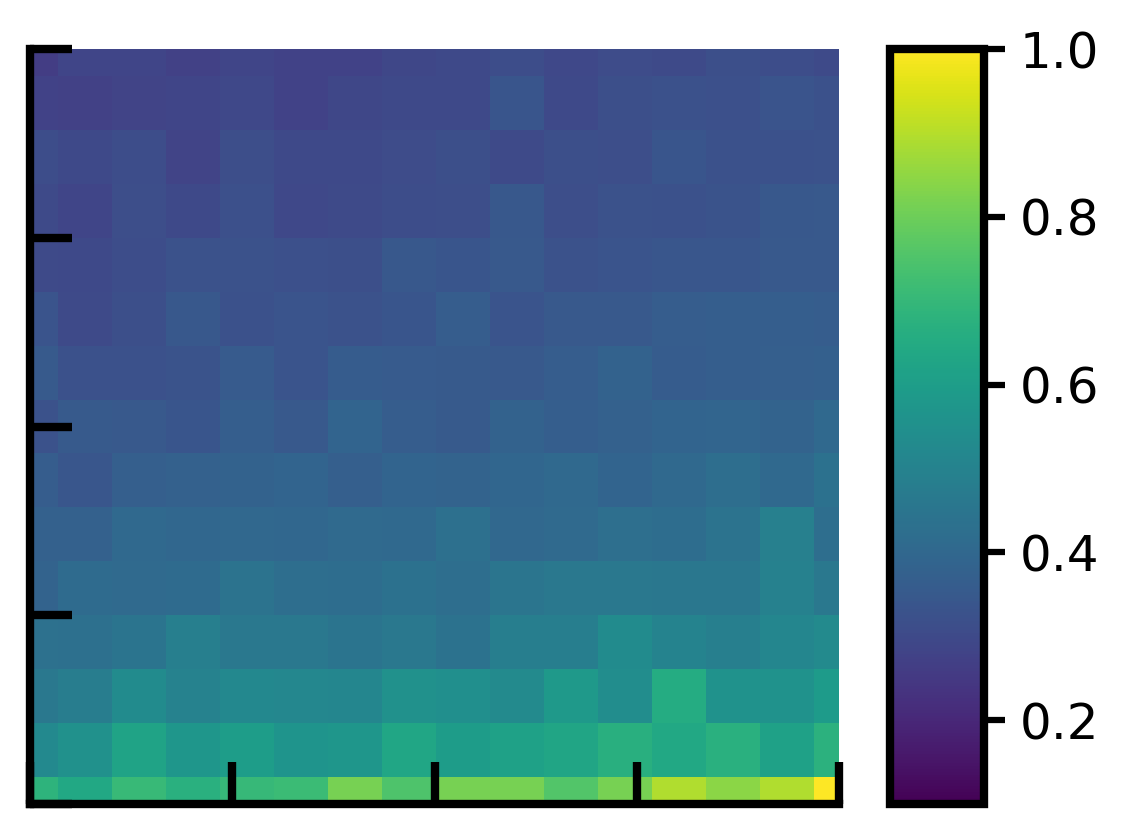

In [20]:
# Plot Sparse Binary - μ (max off-diagonal)
from mirrored_langevin_rnn.utils.visualization.styling import hide_labels

X, Y = np.meshgrid(num_odors, num_osn)

fig, ax = plt.subplots(figsize=(4, 3))

pc = ax.pcolormesh(X, Y, mesh_grid_sparse_binary[:, :, 0],
                   cmap='viridis', norm=norm_global, shading='auto')

apply_style(ax, style_1)

ax.set_xscale('log')
ax.set_xticks([])
ax.set_xlim([1000, 16000])
ax.set_xticks([1000, 2000, 4000, 8000, 16000])
ax.set_ylim(100, 800)  # Y-axis limits based on nSens_values
ax.set_xticklabels(["1000", "", "4000", "", "16000"])
ax.set_yticks([100, 275, 450, 625, 800])
ax.minorticks_off()
ax.set_yticklabels(["100", "", "450", "", "800"])
hide_labels(ax)

color_bar = plt.colorbar(pc, ax=ax, aspect=8)
# color_bar.set_ticks([0, 0.5, 1])

ax.figure.savefig(output_dir / "mutual_coherence_mu_sparse_binary.svg", bbox_inches='tight')

plt.tight_layout()
plt.show()

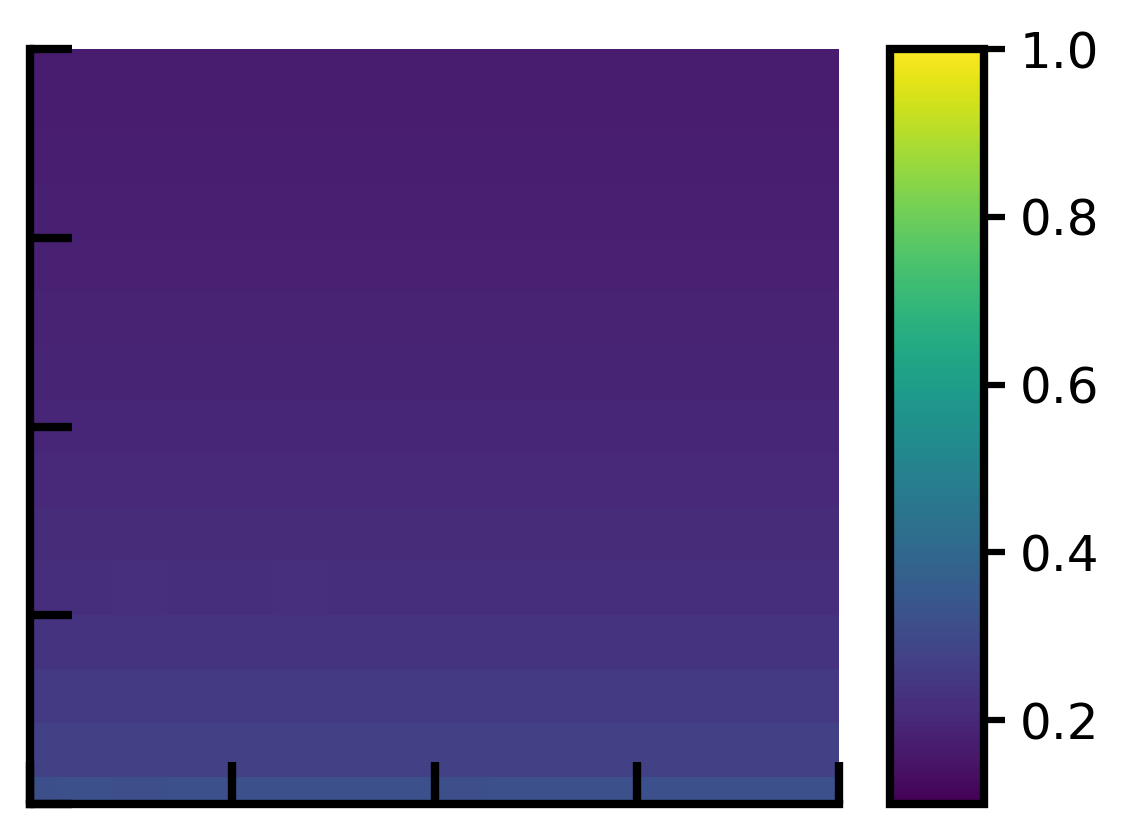

In [21]:
# Plot Sparse Binary - μₜ (threshold-averaged)
from mirrored_langevin_rnn.utils.visualization.styling import hide_labels

X, Y = np.meshgrid(num_odors, num_osn)

fig, ax = plt.subplots(figsize=(4, 3))

pc = ax.pcolormesh(X, Y, mesh_grid_sparse_binary[:, :, 2],
                   cmap='viridis', norm=norm_global, shading='auto')

apply_style(ax, style_1)

ax.set_xscale('log')
ax.set_xticks([])
ax.set_xlim([1000, 16000])
ax.set_xticks([1000, 2000, 4000, 8000, 16000])
ax.set_ylim(100, 800)  # Y-axis limits based on nSens_values
ax.set_xticklabels(["1000", "", "4000", "", "16000"])
ax.set_yticks([100, 275, 450, 625, 800])
ax.minorticks_off()
ax.set_yticklabels(["100", "", "450", "", "800"])
hide_labels(ax)

color_bar = plt.colorbar(pc, ax=ax, aspect=8)

ax.figure.savefig(output_dir / "mutual_coherence_averaged_mu_sparse_binary.svg", bbox_inches='tight')

plt.tight_layout()
plt.show()

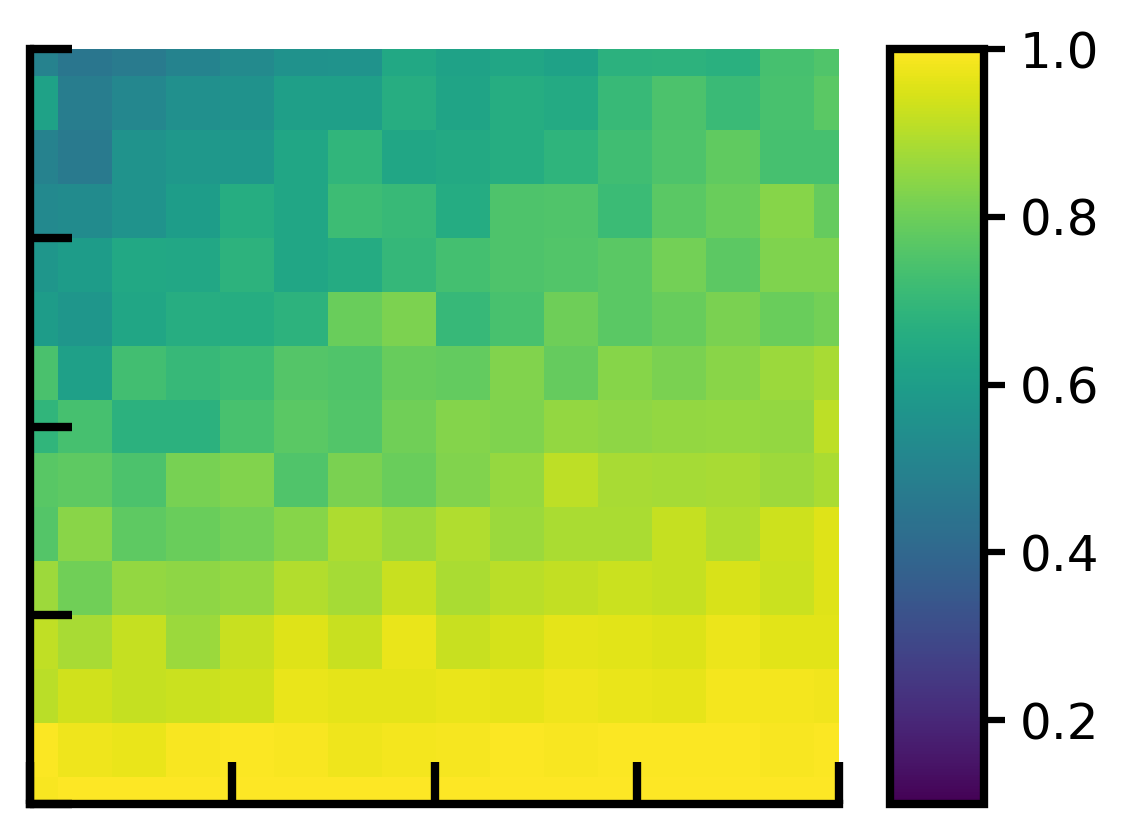

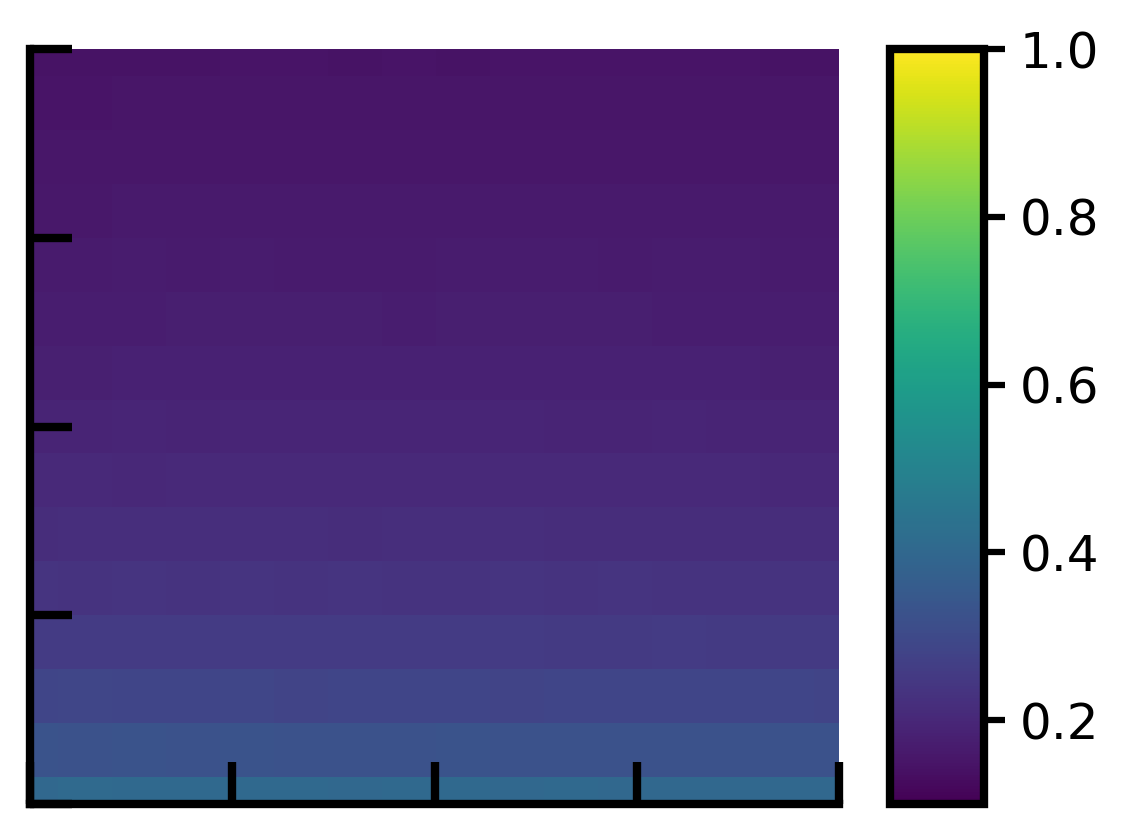

In [22]:
# Plot Sparse Gamma - μ (max off-diagonal)
from mirrored_langevin_rnn.utils.visualization.styling import hide_labels

X, Y = np.meshgrid(num_odors, num_osn)

fig, ax = plt.subplots(figsize=(4, 3))

pc = ax.pcolormesh(X, Y, mesh_grid_sparse_gamma[:, :, 0],
                   cmap='viridis', norm=norm_global, shading='auto')

apply_style(ax, style_1)

ax.set_xscale('log')
ax.set_xticks([])
ax.set_xlim([1000, 16000])
ax.set_xticks([1000, 2000, 4000, 8000, 16000])
ax.set_ylim(100, 800)  # Y-axis limits based on nSens_values
ax.set_xticklabels(["1000", "", "4000", "", "16000"])
ax.set_yticks([100, 275, 450, 625, 800])
ax.minorticks_off()
ax.set_yticklabels(["100", "", "450", "", "800"])
hide_labels(ax)

color_bar = plt.colorbar(pc, ax=ax, aspect=8)

ax.figure.savefig(output_dir / "mutual_coherence_mu_sparse_gamma.svg", bbox_inches='tight')

plt.tight_layout()
plt.show()

# Plot Sparse Gamma - μₜ (threshold-averaged)
from mirrored_langevin_rnn.utils.visualization.styling import hide_labels

X, Y = np.meshgrid(num_odors, num_osn)

fig, ax = plt.subplots(figsize=(4, 3))

pc = ax.pcolormesh(X, Y, mesh_grid_sparse_gamma[:, :, 2],
                   cmap='viridis', norm=norm_global, shading='auto')

apply_style(ax, style_1)

ax.set_xscale('log')
ax.set_xticks([])
ax.set_xlim([1000, 16000])
ax.set_xticks([1000, 2000, 4000, 8000, 16000])
ax.set_ylim(100, 800)  # Y-axis limits based on nSens_values
ax.set_xticklabels(["1000", "", "4000", "", "16000"])
ax.set_yticks([100, 275, 450, 625, 800])
ax.minorticks_off()
ax.set_yticklabels(["100", "", "450", "", "800"])
hide_labels(ax)

color_bar = plt.colorbar(pc, ax=ax, aspect=8)

ax.figure.savefig(output_dir / "mutual_coherence_averaged_mu_sparse_gamma.svg", bbox_inches='tight')

plt.tight_layout()
plt.show()

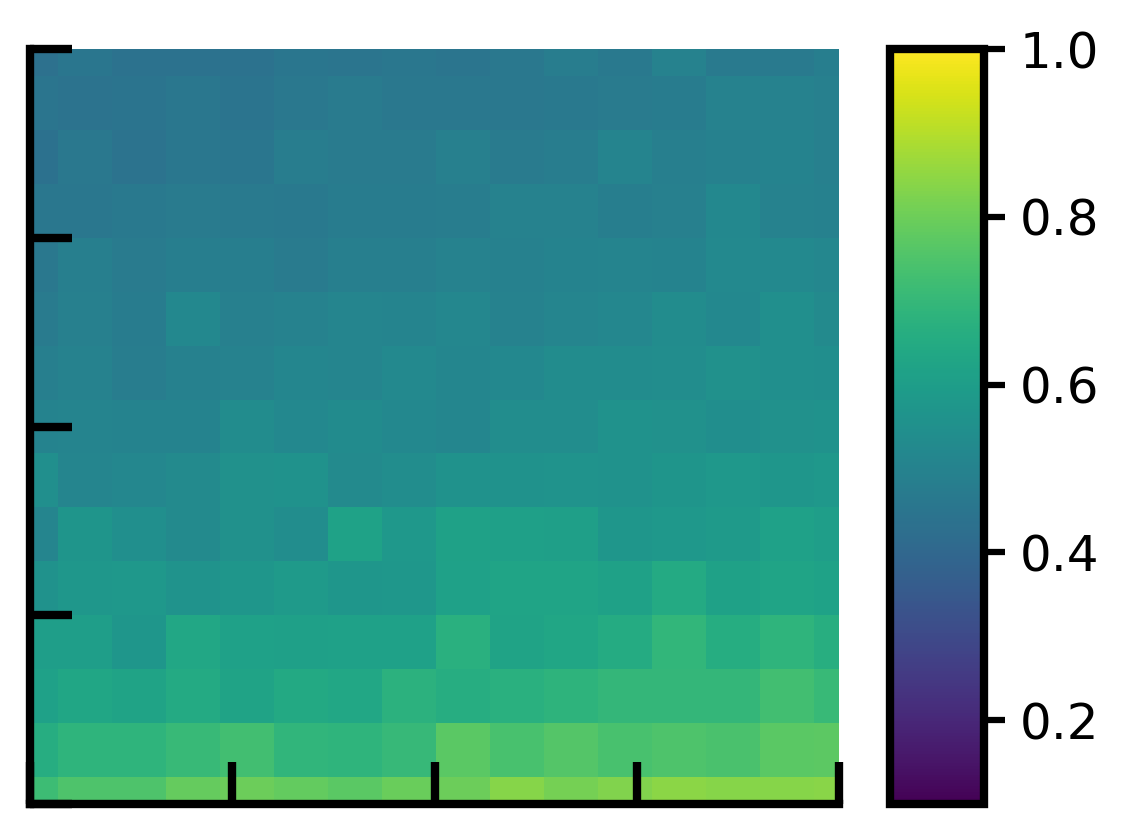

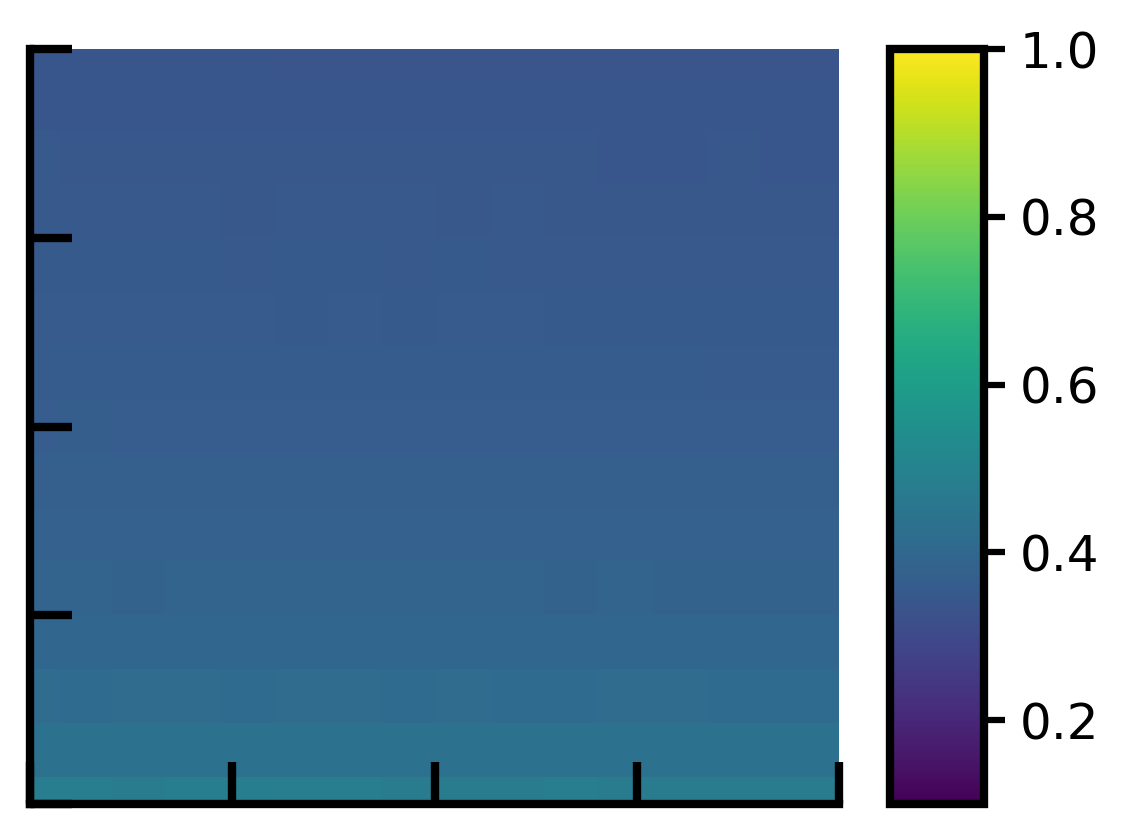

In [23]:
# Plot Dense Gamma - μ (max off-diagonal)
from mirrored_langevin_rnn.utils.visualization.styling import hide_labels

X, Y = np.meshgrid(num_odors, num_osn)

fig, ax = plt.subplots(figsize=(4, 3))

pc = ax.pcolormesh(X, Y, mesh_grid_dense_gamma[:, :, 0],
                   cmap='viridis', norm=norm_global, shading='auto')

apply_style(ax, style_1)

ax.set_xscale('log')
ax.set_xticks([])
ax.set_xlim([1000, 16000])
ax.set_xticks([1000, 2000, 4000, 8000, 16000])
ax.set_ylim(100, 800)  # Y-axis limits based on nSens_values
ax.set_xticklabels(["1000", "", "4000", "", "16000"])
ax.set_yticks([100, 275, 450, 625, 800])
ax.minorticks_off()
ax.set_yticklabels(["100", "", "450", "", "800"])
hide_labels(ax)

color_bar = plt.colorbar(pc, ax=ax, aspect=8)

ax.figure.savefig(output_dir / "mutual_coherence_mu_dense_gamma.svg", bbox_inches='tight')

plt.tight_layout()
plt.show()

# Plot Dense Gamma - μₜ (threshold-averaged)
from mirrored_langevin_rnn.utils.visualization.styling import hide_labels

X, Y = np.meshgrid(num_odors, num_osn)

fig, ax = plt.subplots(figsize=(4, 3))

pc = ax.pcolormesh(X, Y, mesh_grid_dense_gamma[:, :, 2],
                   cmap='viridis', norm=norm_global, shading='auto')

apply_style(ax, style_1)

ax.set_xscale('log')
ax.set_xticks([])
ax.set_xlim([1000, 16000])
ax.set_xticks([1000, 2000, 4000, 8000, 16000])
ax.set_ylim(100, 800)  # Y-axis limits based on nSens_values
ax.set_xticklabels(["1000", "", "4000", "", "16000"])
ax.set_yticks([100, 275, 450, 625, 800])
ax.minorticks_off()
ax.set_yticklabels(["100", "", "450", "", "800"])
hide_labels(ax)

color_bar = plt.colorbar(pc, ax=ax, aspect=8)

ax.figure.savefig(output_dir / "mutual_coherence_averaged_mu_dense_gamma.svg", bbox_inches='tight')

plt.tight_layout()
plt.show()